In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

### 크롤링

In [135]:
dic = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 13_5_2)'}
url = requests.get('https://www.melon.com/genre/song_list.htm?gnrCode=GN0300&dtlGnrCode=#params%5BgnrCode%5D=GN0300&params%5BdtlGnrCode%5D=&params%5BorderBy%5D=NEW&params%5BsteadyYn%5D=N&po=pageObj&startIndex=1', headers = dic).text
html = BeautifulSoup(url)

In [136]:
html.find('tbody').find_all('a',  class_ = 'btn button_icons type03 song_info')[0]

<a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('36835687');" title="Angel's Share 곡정보"><span class="none">곡정보</span></a>

In [80]:
html.find('tbody').find_all('a',  class_ = 'btn button_icons type03 song_info')[49]

<a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('36828774');" title="궁금해 (Feat. Misskiss) 곡정보"><span class="none">곡정보</span></a>

In [59]:
html.find('tbody').find_all('a',  class_ = 'btn button_icons type03 song_info')[0]['href'].split("'")[-2]

'36829227'

In [64]:
url1 = 'https://www.melon.com/song/detail.htm?songId=' + html.find('tbody').find_all('a',  class_ = 'btn button_icons type03 song_info')[0]['href'].split("'")[-2]

In [77]:
html1 = BeautifulSoup(url1.text)
html1.find('div', class_ = 'lyric').text

'\n\t\t\t\t\t\t\t나는 뭐 똑같아너는 뭐 다를까 또외로워하는 밤 또괴로워하는 날 또상처를 덮고 파나도 chains on ma neck떼어 price tags따러 술을 glass이젠 너무 달콤하지여전히 밤을 새꽉 찬 메시지 창나도 이제 일 아니면 pass외로움과 주고받은 대화는나만 알기엔 너무 아까워더 가까워졌음 좋겠지꿈 앞에 기꺼이 호갱이지근데 커진 내 콧대는 피노키오가끔 스스로 날 속이겠지하고픈 건 아직 많지만내 사고의 체제엔 랜섬웨어돈으로 사야 할까 봐 용기를하지만 아직 내 얼굴은 어려 보여한껏 진지하게 준비해도고양이 눈으로 take a look몇 번 말해 난 해낼 거라고변하지 않겠다 했더라두나는 뭐 똑같아여전히 난 그 자리내게 남겨진 거라곤 단지 발전이지what u need나의 희생 지겹지챙겨야지너네 전부 이해하지만차라리 손가락질계속 그리 살라지laneI’m switching lane난 자유자재넌 뭐길래내게 이래라저래라해I’m switching lane난 자유자재넌 뭐길래laneI’m switching lane난 자유자재넌 뭐길래내게 이래라저래라해I’m switching lane난 자유자재넌 뭐길래i don’t give a F내게 정답을 줄래난 더 멋진 걸 원해누가 진짜인 것 같애얘넨 자꾸 장난해나만 남아있는 것 같애이젠 다른 꿈속에나를 가둘래 더 외롭게\n'

In [13]:
from tqdm import tqdm
import time

In [137]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [130]:
dic = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 13_5_2)'}
music_code = []
for i in tqdm(range(1, 1002,50)):
    url = requests.get(f'https://www.melon.com/genre/song_list.htm?gnrCode=GN0300&dtlGnrCode=#params%5BgnrCode%5D=GN0300&params%5BdtlGnrCode%5D=&params%5BorderBy%5D=NEW&params%5BsteadyYn%5D=N&po=pageObj&startIndex={i}', headers = dic).text
    html = BeautifulSoup(url)
    time.sleep(2+np.random.random())
    codeList = html.find('tbody').find_all('a',  class_ = 'btn button_icons type03 song_info')
    for j in codeList:
        code = j['href'].split("'")[-2]
        music_code.append(code)

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:59<00:00,  2.83s/it]


In [144]:
# 브라우저 초기화
driver = webdriver.Chrome()

# 사용자 에이전트 설정
user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_5_2)"
headers = {'User-Agent': user_agent}

song_hrefs = []

for i in tqdm(range(1, 9952, 50)):
    url = f'https://www.melon.com/genre/song_list.htm?gnrCode=GN0300&dtlGnrCode=#params%5BgnrCode%5D=GN0300&params%5BdtlGnrCode%5D=&params%5BorderBy%5D=NEW&params%5BsteadyYn%5D=N&po=pageObj&startIndex={i}'
    driver.get(url)
    time.sleep(2+np.random.random())

    page_source = driver.page_source

    soup = BeautifulSoup(page_source, 'html.parser')
    song_elements = soup.find_all('a', class_='btn button_icons type03 song_info')

    for j in song_elements:
        code = j['href'].split("'")[-2]
        song_hrefs.append(code)

song_hrefs

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [09:24<00:00,  2.82s/it]


['36835687',
 '36828796',
 '36833055',
 '36841574',
 '36838971',
 '36838411',
 '36838268',
 '36837619',
 '36833009',
 '36831169',
 '36831168',
 '36830102',
 '36829212',
 '36829060',
 '36828955',
 '36829227',
 '36833534',
 '36831339',
 '36838496',
 '36838478',
 '36838465',
 '36838329',
 '36829066',
 '36826041',
 '36826752',
 '36835004',
 '36834834',
 '36831447',
 '36838472',
 '36832928',
 '36830117',
 '36828957',
 '36826654',
 '36829081',
 '36828772',
 '36832652',
 '36838471',
 '36838450',
 '36832017',
 '36829102',
 '36828926',
 '36833679',
 '36824616',
 '36837632',
 '36828929',
 '36828927',
 '36826249',
 '36826234',
 '36824635',
 '36831381',
 '36829056',
 '36830677',
 '36838127',
 '36828983',
 '36828923',
 '36828922',
 '36828670',
 '36825902',
 '36823807',
 '36828693',
 '36833803',
 '36828910',
 '36837103',
 '36836481',
 '36828936',
 '36828774',
 '36825344',
 '36823611',
 '36823610',
 '36826214',
 '36830809',
 '36830582',
 '36826937',
 '36831444',
 '36831412',
 '36831369',
 '36831352',

In [151]:
url1 = 'https://www.melon.com/song/detail.htm?songId=' + song_hrefs[0]

In [152]:
url1=requests.get(url1, headers = dic).text
html1 = BeautifulSoup(url1)

In [153]:
html1.find('div', class_ = 'lyric').text

'\n\t\t\t\t\t\t\t으음 it’s been whileyears in the making livin young and wild으음 homie another roundglencairn glass clink more or less시간이 오래 지났지내 열정도 얼마 안 남았지am I losin? 아냐 it must be anangel’s share angel’s share과일주스 그래 맞아 과일주스100% 과즙이 가득하던 내 youthcooking Cous Cous 좁쌀만한 내 분수독한 독수에 spirit 내 10대는 알싸한 알코올 booze블루투스는 무슨? 긴 헤드폰줄 CD Player숙성해 내 꿈 참아 숨 block해 air뚜따의 날을 보며 참을 인을 3번triple wood 발을 푹 담가 셰리, 버번it feels good homie 이제 드디어 마지막 캐스크CS 배치 1번 기대를 안고 오크통을 열었네oh god damn 천사가 들고 튄내 생명의 물 내 열정 got nowhere으음 it’s been whileyears in the making livin young and wild으음 homie another roundglencairn glass clink more or less시간이 오래 지났지내 열정도 얼마 안 남았지am I losin? 아냐 it must be anangel’s share angel’s sharebring your own bottlenow is the time 확인해 내 커리어를I don’t give a shit I don’t give a shit상관없다 말했지만 호불호 갈리는 피트향이 한가득몇번에 걸친 블라인드 테스트에도무장된 내 강한 멘탈은 bullet proof vest씬에 마스터 디스틸러도 못 먹어 본맛돌이 찐해 레그가 라프로익이나 아드백run forrest run forrest오픈런 줄을 세워 NAS들관 다른 NFC47%natural color, Non Chill Filteredit must be god’s work ang

### 음악 코드

In [154]:
lyric = []
for i in tqdm(song_hrefs):
    url1 = 'https://www.melon.com/song/detail.htm?songId=' + i
    url1 = requests.get(url1, headers = dic).text
    time.sleep(1.5+np.random.random())
    html1 = BeautifulSoup(url1)

    try:
        lyric.append(html1.find('div', class_ = 'lyric').text)
    except Exception:
        lyric.append(None)

  1%|▍                                                                            | 61/10000 [02:39<7:13:50,  2.62s/it]


KeyboardInterrupt: 

In [169]:
song_hrefs = pd.DataFrame(song_hrefs)

,0
0,36835687
1,36828796
2,36833055
3,36841574
4,36838971
...,...
9995,35225983
9996,35225971
9997,35225962
9998,35225960


In [170]:
song_hrefs.to_csv('song_hrefs.csv', index = False)

### 음악 가사

In [256]:
user = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6)'}

with open('song_hrefs.csv', 'r', encoding='utf-8') as rf:
    with open('two_lyrics.txt', 'w', encoding='utf-8') as wf:
        nums = rf.readlines()[:5000] 
        for n in tqdm(nums):
            n = n.replace('\n','')
            sub_url = requests.get(f'https://www.melon.com/song/detail.htm?songId={n}', headers=user)
            sub_html = BeautifulSoup(sub_url.text)

            try:
                lyric = str(sub_html.find('div', class_='lyric')).replace('<br/>',' ')
                lyric = BeautifulSoup(lyric).text.strip()
                wf.write(lyric)
                wf.write('\t')
            except:
                pass
            time.sleep(1.8 + np.random.random())

 28%|█████████████████████                                                       | 1382/5000 [58:04<2:32:01,  2.52s/it]


KeyboardInterrupt: 

In [262]:
with open('one_lyrics.txt', 'r', encoding = 'utf-8') as t:
    data = []
    for d in t.readlines():
        d = d.replace('None','')
        d_list = d.split('\t')
        data.extend(d_list)

print(data[7])
len(data)

이제는 올라 타, 말띠고개 위를 Riding 몇 년 전엔 꿈도 못 꿀 상황들의 잔치 부릉 부릉, 시동 걸어 Ye, Ye 액셀 밟아 Ye, Ye, Skid Mark Ye, Ye (Skrr, Skrr, Skrr) 다시 우린 차에 올라탔어 시간을 쫓아 계속 달려버려 엔진 소리 위로 소리를 내질러 다이아가 박힌 시계 우릴 보고 있어 시동을 걸었어 Ridin', 우리 셋 달리지 아직 뭉치면 당연히 Mobbin’, 사랑을 싣고서 가지 조금 더 바삐 움직여 잔치 벌일 때 까지 Runnin’ Up 벗어 나 상식 그 위에 깔지 노래를 하지 Hummingbird 6.31 형의 K3, 날 싣고 하지 비행 널 데리러 가고있어 바로 준비해 여전히 바보 처럼 살아도 난폭 운전 안 해 아방도 비켜 지나 가 남겨 Skid Mark, 뒤에서 후회나 해 더 가야만 해 나답게 (수 많은 눈빛들이) 가라고 해 나에게 (더 밟아 세게 들이) 박아 그래 할 만해 죽거나 살거나 후진 기어 빼고 갈거야 Go Away -! 이제는 올라 타, 말띠고개 위를 Riding 몇 년 전엔 꿈도 못 꿀 상황들의 잔치 부릉 부릉, 시동 걸어 Ye, Ye 액셀 밟아 Ye, Ye, Skid Mark Ye, Ye (Skrr, Skrr, Skrr) 다시 우린 차에 올라탔어 시간을 쫓아 계속 달려버려 엔진 소리 위로 소리를 내질러 다이아가 박힌 시계 우릴 보고 있어 액셀 밟아 파란 색깔의 소나타 Tint Up, 짙게 얼굴은 안 보이게 마치 너 같아 웃으겟소리라도 하지 마 내 기분은 꽤 달라 oh e oh, 비슷해 oh, oh e oh, 못해 더 더 단단히 Setting, 죽어 불려 belly 쟤들은 더 꽉매라고 해 다 보여 내 built-in chilln’, 더 채워 내 feelin’ 다 타, 다 타, 다 타, 다 타, 타 (J-HALL !) We on it and brun it, 우린 소음공해의 범인 다 좋은 음악이 원인, 순간에 예술 된 거리 그 안에서 숨셨지만, 피난 가듯 오른 with my car 떠난거지 떠나자 하면

3917

In [271]:
dataList=[i for i in data if i != '' and len(i) > 800]
len(dataList)

656

In [282]:
with open('two_lyrics.txt', 'r', encoding = 'utf-8') as t:
    data = []
    for d in t.readlines():
        d = d.replace('None','')
        d_list = d.split('\t')
        data.extend(d_list)

In [283]:
dataList=[i for i in data if i != '' ]
len(dataList)

1169

In [288]:
df=pd.DataFrame(dataList)

### 데이터프레임

In [297]:
df=df.rename({0:'data'}, axis=1)
df['label'] = '힙합'

In [298]:
df

,data,label
0,으음 it’s been while years in the making livin y...,힙합
1,Cos you fill this white space now it’s our vil...,힙합
2,I just damnping(huh) 생각은 멀리 (huh) We can runni...,힙합
3,On god I’m living my life to the fullest I ai...,힙합
4,What the f*ck your saying? ** 나 잘해서 하냬 Co**ine...,힙합
...,...,...
1164,안녕하세요 반갑습니다 People call me Super Korean 실례합...,힙합
1165,i'm falling in love 한여름 밤 바람처럼 불어오는 좋은 속삭임 설렘 ...,힙합
1166,한여름 밤 바람처럼 불어오는 좋은 속삭임 설렘 가득한 이 느낌 cuz L.O.V....,힙합
1167,한여름 밤 바람처럼 불어오는 좋은 속삭임 설렘 가득한 이 느낌 cuz L.O.V....,힙합


### 토큰화

In [299]:
from konlpy.tag import Okt

# Okt 객체 생성
okt = Okt()

In [301]:
total = []
for i in tqdm(df['data']):
    words_with_pos = okt.pos(i)
    words = [word for word, pos in words_with_pos if ('*' in word and pos == 'Punctuation') or (pos == 'Verb') or (pos == 'Noun') or (pos == 'Noun') or (pos == 'Adjective') or (pos == 'Alpha')]
    total.append(' '.join(words))
df['data'] = total   

100%|██████████████████████████████████████████████████████████████████████████████| 1169/1169 [00:49<00:00, 23.60it/s]


In [312]:
df = df[df.data != '']

In [329]:
df.to_csv('힙합.csv', index= False, encoding='utf-8')

### 워드클라우드

In [336]:
box = []
for i in df['data']:
    box += i.split()

In [338]:
box = [i for i in box if len(i) != 1]

['it',
 'been',
 'while',
 'years',
 'in',
 'the',
 'making',
 'livin',
 'young',
 'and',
 'wild',
 'homie',
 'another',
 'round',
 'glencairn',
 'glass',
 'clink',
 'more',
 'or',
 'less',
 '시간',
 '지났지',
 '열정',
 '얼마',
 '남았지',
 'am',
 'losin',
 '아냐',
 'it',
 'must',
 'be',
 'an',
 'angel',
 'share',
 'angel',
 'share',
 '과일',
 '주스',
 '그래',
 '맞아',
 '과일',
 '주스',
 '과즙',
 '가득하던',
 'youth',
 'cooking',
 'Cous',
 'Cous',
 '좁쌀',
 '분수',
 '독한',
 '독수',
 'spirit',
 '대는',
 '알싸한',
 '알코올',
 'booze',
 '블루투스',
 '무슨',
 '헤드폰',
 'CD',
 'Player',
 '숙성해',
 '참아',
 'block',
 'air',
 '따의',
 '보며',
 '참을',
 'triple',
 'wood',
 '담가',
 '셰리',
 '버번',
 'it',
 'feels',
 'good',
 'homie',
 '이제',
 '마지막',
 '캐스',
 'CS',
 '배치',
 '기대',
 '안고',
 '오크',
 '열었네',
 'oh',
 'god',
 'damn',
 '천사',
 '들고',
 '생명',
 '열정',
 'got',
 'nowhere',
 'it',
 'been',
 'while',
 'years',
 'in',
 'the',
 'making',
 'livin',
 'young',
 'and',
 'wild',
 'homie',
 'another',
 'round',
 'glencairn',
 'glass',
 'clink',
 'more',
 'or',
 'less',
 '시간',
 '

In [367]:
dic = {}
for i in box:
    if i not in dic:
        if i not in ['you', 'the', 'my', 'it', 'me','우리', 'while', 'years', 'in', 'to', 'like','up', 'on','in','don','시간','be','that','all','and','사랑','나를','love', 'your','can','우린','with']:
            dic[i] = 1
    else:
        dic[i] += 1
dic

{'been': 111,
 'making': 25,
 'livin': 28,
 'young': 31,
 'wild': 9,
 'homie': 10,
 'another': 50,
 'round': 17,
 'glencairn': 3,
 'glass': 6,
 'clink': 5,
 'more': 306,
 'or': 164,
 'less': 6,
 '지났지': 4,
 '열정': 28,
 '얼마': 41,
 '남았지': 11,
 'am': 93,
 'losin': 3,
 '아냐': 187,
 'must': 14,
 'an': 61,
 'angel': 17,
 'share': 12,
 '과일': 3,
 '주스': 3,
 '그래': 405,
 '맞아': 86,
 '과즙': 1,
 '가득하던': 3,
 'youth': 4,
 'cooking': 8,
 'Cous': 2,
 '좁쌀': 1,
 '분수': 4,
 '독한': 6,
 '독수': 1,
 'spirit': 9,
 '대는': 18,
 '알싸한': 1,
 '알코올': 5,
 'booze': 1,
 '블루투스': 2,
 '무슨': 67,
 '헤드폰': 3,
 'CD': 4,
 'Player': 2,
 '숙성해': 1,
 '참아': 25,
 'block': 39,
 'air': 34,
 '따의': 1,
 '보며': 45,
 '참을': 7,
 'triple': 2,
 'wood': 1,
 '담가': 1,
 '셰리': 1,
 '버번': 1,
 'feels': 21,
 'good': 156,
 '이제': 797,
 '마지막': 126,
 '캐스': 1,
 'CS': 1,
 '배치': 1,
 '기대': 42,
 '안고': 29,
 '오크': 1,
 '열었네': 1,
 'oh': 457,
 'god': 68,
 'damn': 50,
 '천사': 5,
 '들고': 39,
 '생명': 3,
 'got': 521,
 'nowhere': 1,
 'bring': 19,
 'own': 30,
 'bottle': 17,
 'now': 334,

In [368]:
result = pd.DataFrame({'단어': dic.keys(), '빈도': dic.values()})
result.sort_values('빈도', ascending=False, inplace=True)

In [369]:
result.head(20)

,단어,빈도
212,yeah,1248
452,go,826
62,이제,797
443,없어,728
346,no,718
267,다시,708
132,we,698
714,know,670
208,생각,631
205,just,614


In [370]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

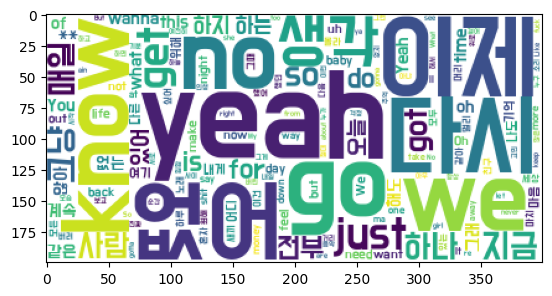

In [371]:
wc = WordCloud(background_color='white', font_path='BMDOHYEON_ttf.ttf')
cloud = wc.generate_from_frequencies(dic)
plt.imshow(cloud)
plt.show()

In [372]:
from PIL import Image
import numpy as np

In [386]:
img = Image.open('../data/skeleton.png')

In [387]:
img=np.array(img)

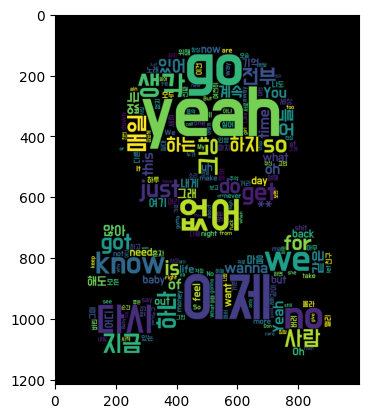

In [388]:
wc = WordCloud(background_color='black', 
               font_path='BMDOHYEON_ttf.ttf',
              mask=img)
cloud = wc.generate_from_frequencies(dic)
plt.imshow(cloud)
plt.show()